<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Nao-Prob/blob/main/Aula_6_Agroup_Hier%C3%A1rquico_Aglomerativo_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas e métodos necessários
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Ex 2

In [ ]:
# Leitura dos dados externos
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Pós/ML MNP/Datasets/shopping_data.csv")
df.head()   # Exibe as 5 primeiras linhas do DataFrame

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Pré-processamento: codificação dos dados genre
df['Genero'] = 0
df['Genero'].loc[df['Genre'] == 'Female'] = 1
df.head()

In [ ]:
# Pré-processamento (Padronização dos dados)
X = df[['Genero','Age','Annual Income (k$)','Spending Score (1-100)']]

escalonador = StandardScaler()
escalonador.fit(X)
X_Norm = escalonador.transform(X)

In [ ]:
# Agrupamento Hierárquico Aglomerativo sem ajuste dos clusters
modeloCLH = AgglomerativeClustering()
modeloCLH.fit(X_Norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
# Exibição as informações geradas pelo clusterizador
print(f'Total de clusters gerados: {modeloCLH.n_clusters_}')
print(f'Rótulos: {modeloCLH.labels_}')

Total de clusters gerados: 2
Rótulos: [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


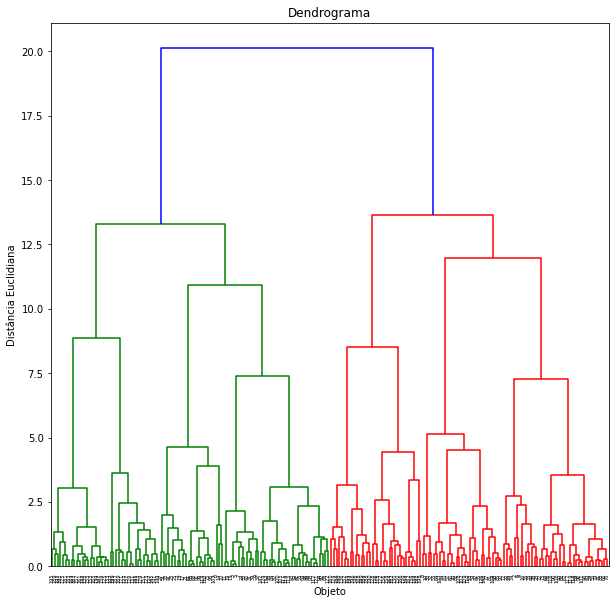

In [ ]:
# Traçado do dendrograma
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (10,10))
dendro = dendrogram(linkage(X_Norm, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Objeto')
plt.ylabel('Distância Euclidiana')
plt.show()

In [ ]:
# Considerando 5 clusters
# Agrupamento Hierárquico Aglomerativo
modeloCLH = AgglomerativeClustering(n_clusters=5)
modeloCLH.fit(X_Norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

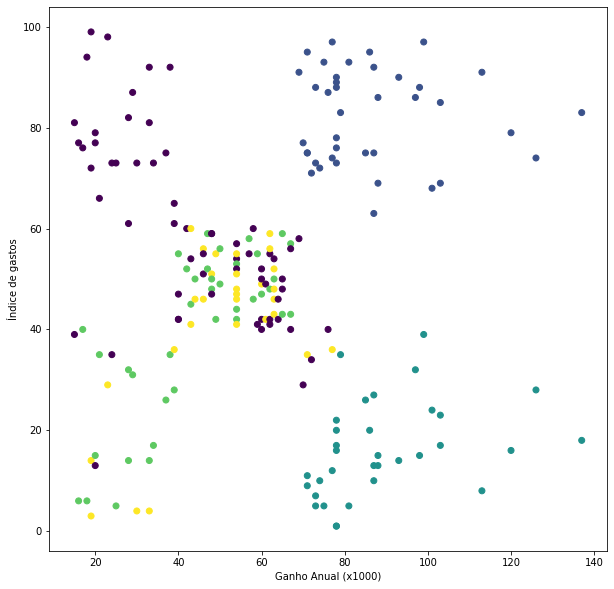

In [ ]:
# Diagrama de dispersão de Renda anual x Índice de gastos
plt.figure(figsize=(10,10))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c = modeloCLH.labels_)
plt.xlabel('Ganho Anual (x1000)')
plt.ylabel('Índice de gastos')
plt.show()

In [ ]:
df['grupo'] = modeloCLH.labels_
df.groupby(by='grupo').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genero
grupo,,,,,
0,62.409836,26.147541,43.770492,58.967213,0.622951
1,162.000000,32.692308,86.538462,82.128205,0.538462
2,166.090909,41.454545,89.090909,16.181818,0.454545
3,61.210526,49.789474,44.105263,39.657895,1.000000
4,74.758621,56.551724,50.034483,41.344828,0.000000


In [ ]:
# Refazendo a análise
# Pré-processamento (Padronização dos dados)
X = df[['Annual Income (k$)','Spending Score (1-100)']]

escalonador = StandardScaler()
escalonador.fit(X)
X_Norm = escalonador.transform(X)

In [ ]:
# Agrupamento Hierárquico Aglomerativo sem ajuste dos clusters
modeloCLH2 = AgglomerativeClustering(n_clusters=5)
modeloCLH2.fit(X_Norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

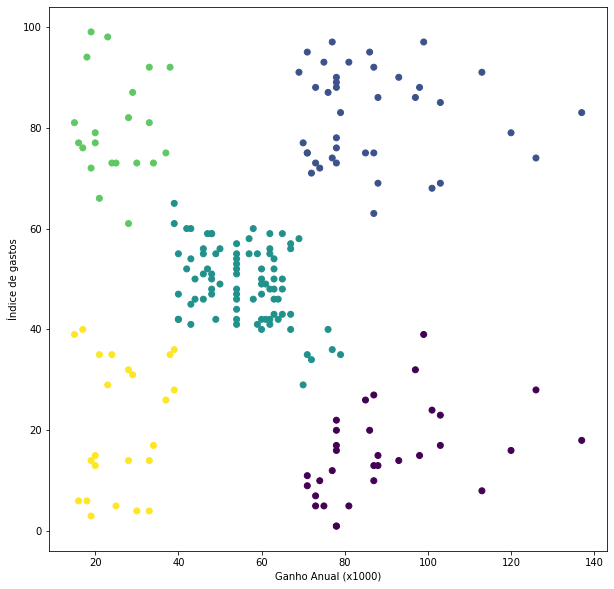

In [ ]:
# Diagrama de dispersão de Renda anual x Índice de gastos
plt.figure(figsize=(10,10))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c = modeloCLH2.labels_)
plt.xlabel('Ganho Anual (x1000)')
plt.ylabel('Índice de gastos')
plt.show()

Com 5 grupos os agrupamentos parecem fazer mais sentido, analisando os gráficos somente do ganho anual e índice de gastos.